In [62]:
import pandas as pd 
import glob
import os

In [63]:
path='C:/Users/Lenovo/OneDrive/Bureau/Demandforecast'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_list=[]
for f in all_files:
    df = pd.read_csv(f)
    df_list.append(df)
data = pd.concat(df_list, ignore_index=True)


In [64]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743730 entries, 0 to 3743729
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 371.3+ MB


In [66]:
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    457137
start_station_id      457134
end_station_name      487755
end_station_id        487755
start_lat                  0
start_lng                  0
end_lat                 3233
end_lng                 3233
member_casual              0
dtype: int64

In [67]:
data.duplicated().sum()

0

In [68]:
data['start_station_name'].value_counts()

start_station_name
Streeter Dr & Grand Ave            63118
Michigan Ave & Oak St              33279
Wells St & Concord Ln              30738
Millennium Park                    29766
Theater on the Lake                27278
                                   ...  
Shabbona Park                          1
Lyft Driver Center Private Rack        1
Kenneth Ave & 50th St                  1
Whipple St & Irving Park Rd            1
St Louis Ave & 59th St                 1
Name: count, Length: 804, dtype: int64

In [69]:
for col in data.columns:
    if data[col].dtype == 'float64':
       data[col] = data[col].fillna(data[col].mean())
  

        

In [70]:
data.dropna(inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3074630 entries, 50 to 3743729
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 328.4+ MB


In [72]:
data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [73]:
data.info()
       
        

<class 'pandas.core.frame.DataFrame'>
Index: 3074630 entries, 50 to 3743729
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 328.4+ MB


In [74]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [75]:
data['started_at_day'] = data['started_at'].dt.strftime('%A')
data['started_at_hour'] = data['started_at'].dt.hour
data['ended_at_day'] = data['ended_at'].dt.strftime('%A')
data['ended_at_hour'] = data['ended_at'].dt.hour

data['duration'] = data['ended_at'] - data['started_at']

In [76]:
data['duration_mins'] = (data['duration'].dt.total_seconds()/60).round()

In [77]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_day,started_at_hour,ended_at_day,ended_at_hour,duration,duration_mins
50,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,41.902924,-87.637715,41.902924,-87.637715,member,Friday,7,Friday,7,0 days 00:16:16,16.0
51,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,Wednesday,8,Wednesday,8,0 days 00:02:01,2.0
53,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,41.950780,-87.659172,41.967096,-87.667429,member,Sunday,12,Sunday,12,0 days 00:07:47,8.0
56,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,41.889177,-87.638506,41.888716,-87.644448,member,Tuesday,12,Tuesday,12,0 days 00:02:38,3.0
57,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,Tuesday,11,Tuesday,11,0 days 00:02:26,2.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3074630 entries, 50 to 3743729
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  started_at_day      object         
 14  started_at_hour     int32          
 15  ended_at_day        object         
 16  ended_at_hour       int32          
 17  duration            timedelta64[ns]
 18  duration_mins       float64        
dtypes: datetime64[ns](2), flo

In [79]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'started_at_day', 'started_at_hour', 'ended_at_day',
       'ended_at_hour', 'duration', 'duration_mins'],
      dtype='object')

In [80]:
data.shape

(3074630, 19)

In [81]:
test = data.groupby(['started_at_day','member_casual'])['ride_id'].count().to_frame().reset_index()
test

,started_at_day,member_casual,ride_id
0,Friday,casual,218440
1,Friday,member,228444
2,Monday,casual,158671
3,Monday,member,201712
4,Saturday,casual,338340
5,Saturday,member,222033
6,Sunday,casual,289480
7,Sunday,member,194878
8,Thursday,casual,172607
9,Thursday,member,239496


In [82]:
import plotly.express as px 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

Text(0.5, 1.0, 'Number of Rides by day of the Week')

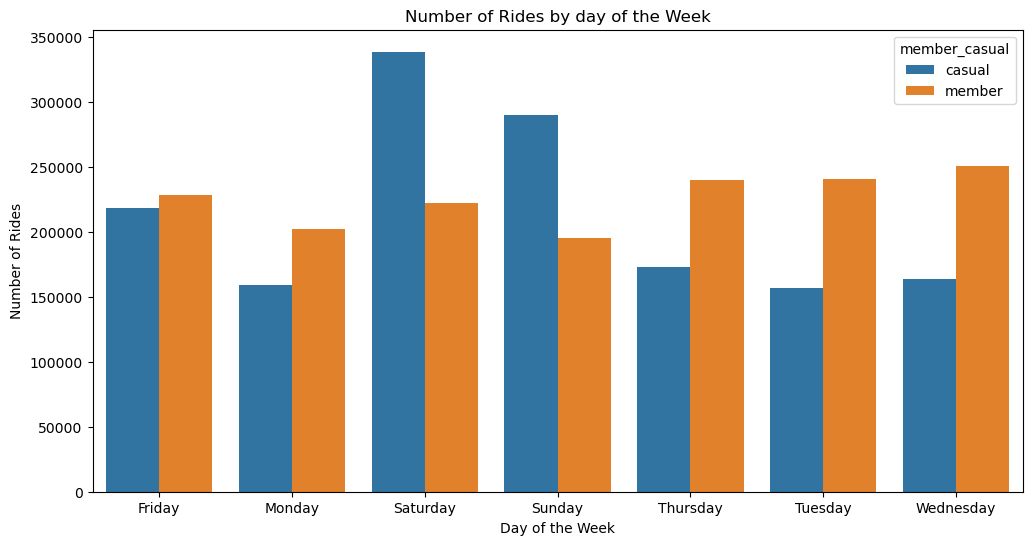

In [83]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data = test, x='started_at_day', y= 'ride_id', hue='member_casual')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by day of the Week")

In [84]:
df_start = data.groupby(['started_at_hour','started_at_day'])['ride_id'].count().to_frame().reset_index()
df_start.head(10)

,started_at_hour,started_at_day,ride_id
0,0,Friday,6153
1,0,Monday,4180
2,0,Saturday,13735
3,0,Sunday,16446
4,0,Thursday,3650
5,0,Tuesday,2449
6,0,Wednesday,3107
7,1,Friday,3804
8,1,Monday,2502
9,1,Saturday,11962


Text(0, 0.5, 'Number of Rides')

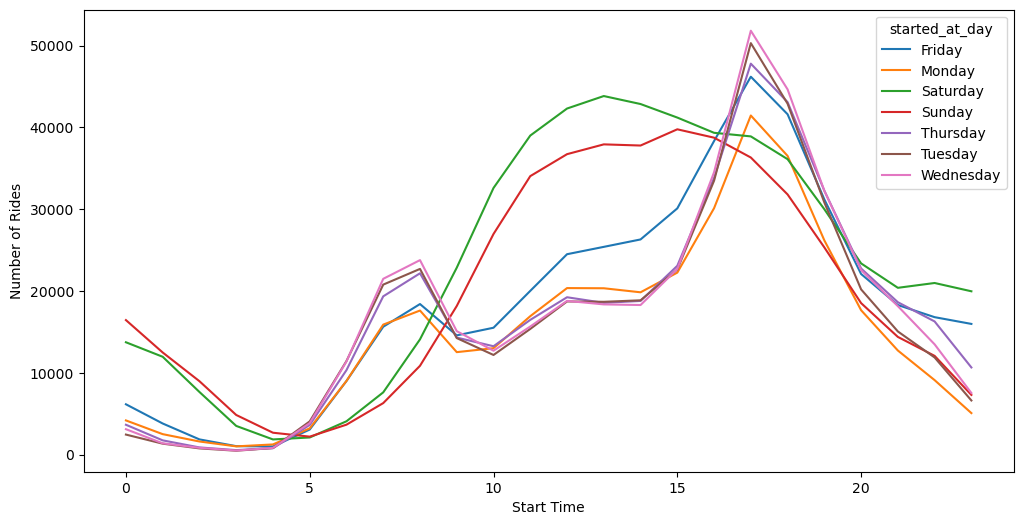

In [85]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.lineplot(data = df_start, x = 'started_at_hour', y= 'ride_id', hue = 'started_at_day', ax=ax)
plt.xlabel("Start Time")
plt.ylabel("Number of Rides")

In [86]:
data.shape

(3074630, 19)

In [87]:
import numpy as np
weekday = ['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']
data["day"] = data["started_at_day"].apply(lambda x: 'Weekday' if x in weekday else 'Weekend')


In [88]:
df1 = data.groupby(['started_at_hour','day'])['ride_id'].count().to_frame().reset_index()
df1.head()

,started_at_hour,day,ride_id
0,0,Weekday,19539
1,0,Weekend,30181
2,1,Weekday,10768
3,1,Weekend,24448
4,2,Weekday,5929


Text(0, 0.5, 'Number of Rides')

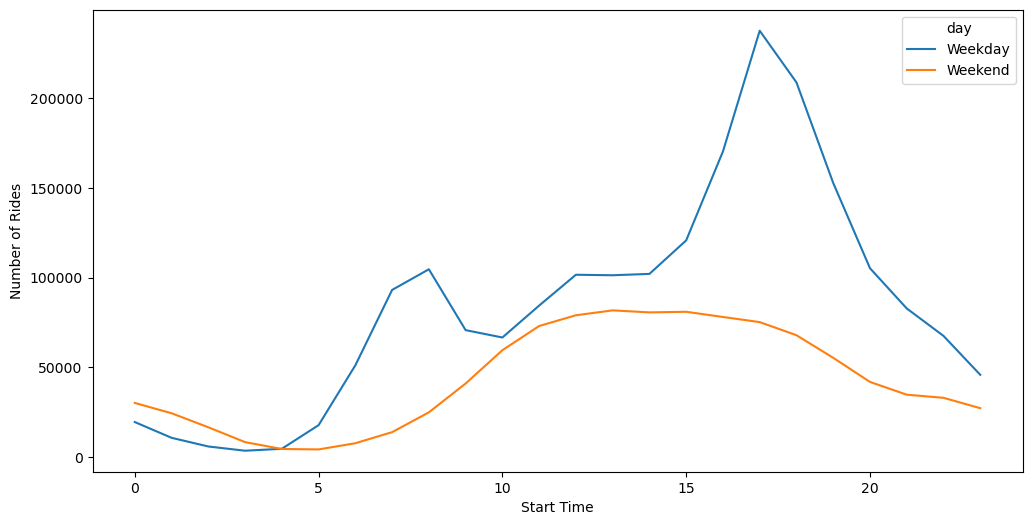

In [89]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data = df1, x = 'started_at_hour', y= 'ride_id', hue = 'day', ax=ax)
plt.xlabel("Start Time")
plt.ylabel("Number of Rides")

In [90]:
df3 = data.groupby(['member_casual','started_at_day','started_at_hour','day'])['ride_id'].count().to_frame().reset_index().rename(columns = {'ride_id':'number_of_rides'})
df3.head()

,member_casual,started_at_day,started_at_hour,day,number_of_rides
0,casual,Friday,0,Weekday,3798
1,casual,Friday,1,Weekday,2539
2,casual,Friday,2,Weekday,1252
3,casual,Friday,3,Weekday,694
4,casual,Friday,4,Weekday,534


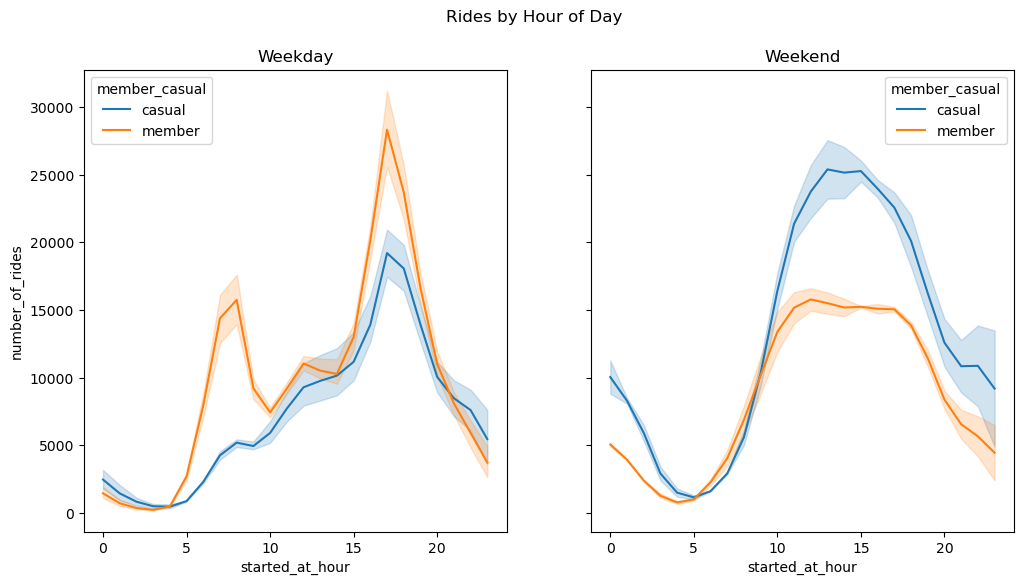

In [91]:
weekday = df3[df3['day'] == "Weekday"]
weekend = df3[df3['day'] == "Weekend"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)
fig.suptitle('Rides by Hour of Day')
ax1.set_title("Weekday")
ax2.set_title("Weekend")
sns.lineplot(data = weekday, x = 'started_at_hour', y= 'number_of_rides', hue = 'member_casual', ax=ax1)
sns.lineplot(data = weekend, x = 'started_at_hour', y= 'number_of_rides', hue = 'member_casual', ax=ax2);

In [92]:
data['duration'].describe()


count                      3074630
mean     0 days 00:22:07.431065526
std      0 days 03:05:53.202707855
min              -1 days +23:52:57
25%                0 days 00:07:13
50%                0 days 00:12:36
75%                0 days 00:22:34
max               38 days 20:24:09
Name: duration, dtype: object

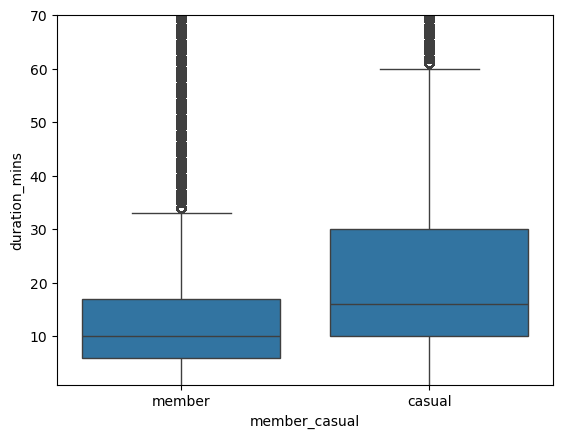

In [93]:
sns.boxplot(data, x = 'member_casual', y = 'duration_mins')
plt.ylim(1, 70)
plt.show()

Text(0.5, 1.0, 'Distribution of Ride Duration by Day of the Week')

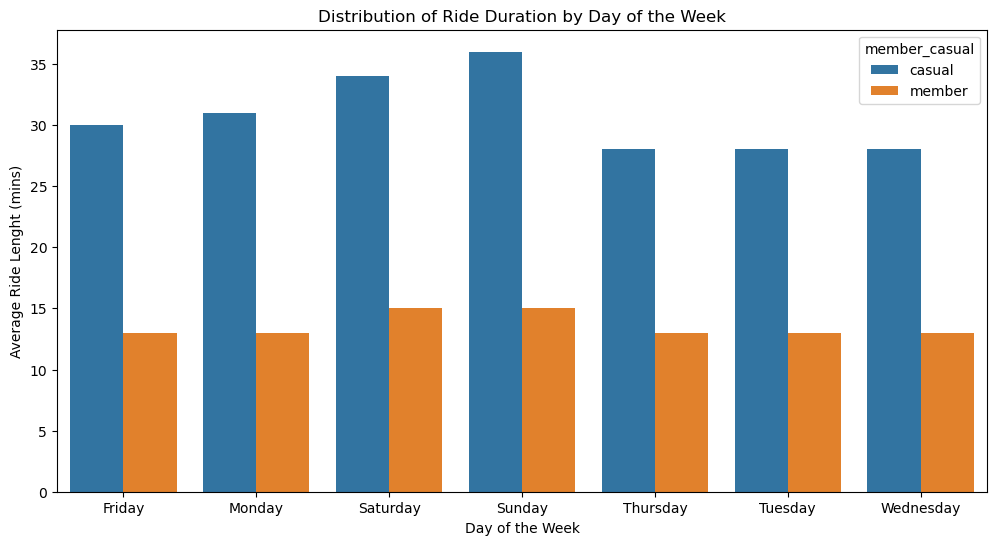

In [94]:
new_df = data.groupby(['started_at_day', 'member_casual', 'day'])['duration_mins'].mean().round().to_frame().reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data = new_df, x='started_at_day', y= 'duration_mins', hue='member_casual')
plt.xlabel("Day of the Week")
plt.ylabel("Average Ride Lenght (mins)")
plt.title("Distribution of Ride Duration by Day of the Week")

In [95]:
data['start_station_name'].value_counts().sort_values(ascending=False).head(10).T

start_station_name
Streeter Dr & Grand Ave               61273
Michigan Ave & Oak St                 32081
Wells St & Concord Ln                 29383
Millennium Park                       28484
Theater on the Lake                   26470
Clark St & Elm St                     26033
Wells St & Elm St                     24456
Clark St & Lincoln Ave                23166
DuSable Lake Shore Dr & North Blvd    22170
Clark St & Armitage Ave               22071
Name: count, dtype: int64

In [96]:
new2 = data.groupby(['member_casual','start_station_name', 'start_lat', 'start_lng'])['ride_id'].count().to_frame().sort_values('ride_id', ascending=False).reset_index()
new2.head(10)

,member_casual,start_station_name,start_lat,start_lng,ride_id
0,casual,Streeter Dr & Grand Ave,41.892278,-87.612043,43215
1,casual,Michigan Ave & Oak St,41.900960,-87.623777,13696
2,casual,Theater on the Lake,41.926277,-87.630834,13687
3,casual,Millennium Park,41.881032,-87.624084,12799
4,member,Clark St & Elm St,41.902973,-87.631280,11819
5,casual,DuSable Lake Shore Dr & North Blvd,41.911722,-87.626804,11707
6,member,Wells St & Concord Ln,41.912133,-87.634656,11577
7,casual,DuSable Lake Shore Dr & Monroe St,41.880958,-87.616743,11517
8,casual,Wells St & Concord Ln,41.912133,-87.634656,11149
9,member,Kingsbury St & Kinzie St,41.889177,-87.638506,10419


In [97]:
top_5_casual = new2[new2.member_casual == 'casual'].sort_values('ride_id', ascending=False).head()
top_5_member = new2[new2.member_casual == 'member'].sort_values('ride_id', ascending=False).head()
top_starting_locations = pd.concat([top_5_member, top_5_casual])
top_starting_locations

,member_casual,start_station_name,start_lat,start_lng,ride_id
4,member,Clark St & Elm St,41.902973,-87.631280,11819
6,member,Wells St & Concord Ln,41.912133,-87.634656,11577
9,member,Kingsbury St & Kinzie St,41.889177,-87.638506,10419
11,member,Wells St & Elm St,41.903222,-87.634324,9978
12,member,Theater on the Lake,41.926277,-87.630834,9684
0,casual,Streeter Dr & Grand Ave,41.892278,-87.612043,43215
1,casual,Michigan Ave & Oak St,41.900960,-87.623777,13696
2,casual,Theater on the Lake,41.926277,-87.630834,13687
3,casual,Millennium Park,41.881032,-87.624084,12799
5,casual,DuSable Lake Shore Dr & North Blvd,41.911722,-87.626804,11707


In [98]:

top_starting_locations['start_lat'] = top_starting_locations['start_lat'].astype(float)
top_starting_locations['start_lng'] = top_starting_locations['start_lng'].astype(float)

fig = px.scatter_mapbox(
    top_starting_locations,
    lat = 'start_lat',
    lon = 'start_lng',
    mapbox_style ='open-street-map',
    size = 'ride_id',
    color = 'member_casual'
)

fig.show()

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3074630 entries, 50 to 3743729
Data columns (total 20 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  started_at_day      object         
 14  started_at_hour     int32          
 15  ended_at_day        object         
 16  ended_at_hour       int32          
 17  duration            timedelta64[ns]
 18  duration_mins       float64        
 19  day                 objec

In [100]:
new3 = data.groupby(['member_casual','end_station_name', 'end_lat', 'end_lng'])['ride_id'].count().to_frame().sort_values('ride_id', ascending=False).reset_index()
new3.head(10)

,member_casual,end_station_name,end_lat,end_lng,ride_id
0,casual,Streeter Dr & Grand Ave,41.892278,-87.612043,44709
1,casual,Theater on the Lake,41.926277,-87.630834,14586
2,casual,Michigan Ave & Oak St,41.900960,-87.623777,14309
3,casual,DuSable Lake Shore Dr & North Blvd,41.911722,-87.626804,13884
4,casual,Millennium Park,41.881032,-87.624084,13234
5,member,Wells St & Concord Ln,41.912133,-87.634656,11972
6,member,Clark St & Elm St,41.902973,-87.631280,11818
7,casual,DuSable Lake Shore Dr & Monroe St,41.880958,-87.616743,11110
8,casual,Wells St & Concord Ln,41.912133,-87.634656,10835
9,member,Kingsbury St & Kinzie St,41.889177,-87.638506,10681


In [101]:
top_5_casual = new3[new3.member_casual == 'casual'].sort_values('ride_id', ascending=False).head()
top_5_member = new3[new3.member_casual == 'member'].sort_values('ride_id', ascending=False).head()
top_ended_locations = pd.concat([top_5_member, top_5_casual])

top_ended_locations['end_lat'] = top_ended_locations['end_lat'].astype(float)
top_ended_locations['end_lng'] = top_ended_locations['end_lng'].astype(float)
top_ended_locations.head()




,member_casual,end_station_name,end_lat,end_lng,ride_id
5,member,Wells St & Concord Ln,41.912133,-87.634656,11972
6,member,Clark St & Elm St,41.902973,-87.631280,11818
9,member,Kingsbury St & Kinzie St,41.889177,-87.638506,10681
10,member,Wells St & Elm St,41.903222,-87.634324,10505
15,member,Broadway & Barry Ave,41.937582,-87.644098,9301


In [102]:
fig = px.scatter_mapbox(
    top_ended_locations,
    lat = 'end_lat',
    lon = 'end_lng',
    mapbox_style ='open-street-map',
    size = 'ride_id',
    color = 'member_casual')

fig.show()

In [103]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'started_at_day', 'started_at_hour', 'ended_at_day',
       'ended_at_hour', 'duration', 'duration_mins', 'day'],
      dtype='object')

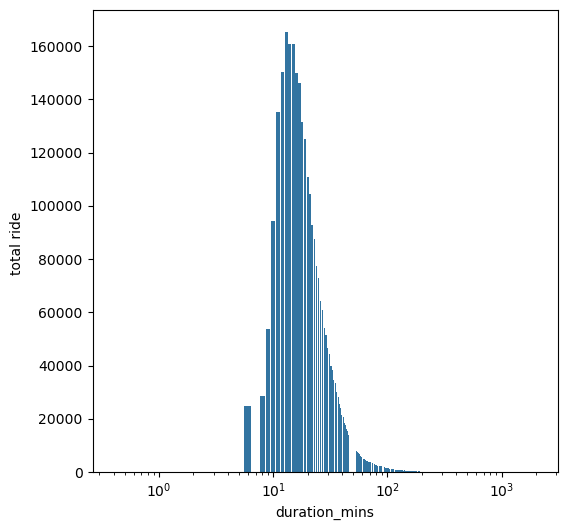

In [104]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='duration_mins')
plt.xscale('log')
plt.ylabel('total ride ')
plt.show()


In [105]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'started_at_day', 'started_at_hour', 'ended_at_day',
       'ended_at_hour', 'duration', 'duration_mins', 'day'],
      dtype='object')

In [106]:
df_cleaned=pd.DataFrame
df_cleaned=data.drop(columns={'ride_id', 'rideable_type','started_at', 'ended_at', 'start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual','duration',})

In [107]:
df_cleaned.columns

Index(['start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'ended_at_day', 'ended_at_hour', 'duration_mins',
       'day'],
      dtype='object')

In [108]:
df_cleaned = df_cleaned[df_cleaned['duration_mins'] >= 8]

In [109]:
df_cleaned.shape

(2261848, 8)

In [111]:
df_cleaned.to_csv('cleaned_demand_forecast.csv', index=False)